# Import Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# Import Data

In [2]:
games=pd.read_csv(r"D:\Data Analyst\Projects\all_games.csv")

In [3]:
games.head()

,name,platform,release_date,summary,meta_score,user_review
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998","As a young boy, Link is tricked by Ganondorf, ...",99,9.1
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",As most major publishers' development efforts ...,98,7.4
2,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",[Metacritic's 2008 PS3 Game of the Year; Also ...,98,7.7
3,SoulCalibur,Dreamcast,"September 8, 1999","This is a tale of souls and swords, transcendi...",98,8.4
4,Grand Theft Auto IV,Xbox 360,"April 29, 2008",[Metacritic's 2008 Xbox 360 Game of the Year; ...,98,7.9


In [4]:
games.shape

(18800, 6)

In [5]:
games.describe()

,meta_score
count,18800.000000
mean,70.648883
std,12.225006
min,20.000000
25%,64.000000
50%,72.000000
75%,80.000000
max,99.000000


In [6]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18800 entries, 0 to 18799
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          18800 non-null  object
 1   platform      18800 non-null  object
 2   release_date  18800 non-null  object
 3   summary       18686 non-null  object
 4   meta_score    18800 non-null  int64 
 5   user_review   18800 non-null  object
dtypes: int64(1), object(5)
memory usage: 881.4+ KB


# Check Null Values

In [7]:
games.isna().sum()

name              0
platform          0
release_date      0
summary         114
meta_score        0
user_review       0
dtype: int64

In [8]:
#Percentage

round(games.isna().sum()/len(games)*100, 2)

name            0.00
platform        0.00
release_date    0.00
summary         0.61
meta_score      0.00
user_review     0.00
dtype: float64

# Correcting Data Types

In [9]:
#Change release_date into datetime format

games['release_date'] = pd.to_datetime(games['release_date'])

In [10]:
games['release_date'].dtypes

dtype('<M8[ns]')

In [11]:
games['user_review'].unique()

array(['9.1', '7.4', '7.7', '8.4', '7.9', '8.0', '8.3', '6.2', '8.7',
       '7.5', '8.8', '8.5', '8.6', '8.9', '8.2', '9.2', '7.8', '9.0',
       '9.3', '8.1', '6.8', '7.6', '6.9', '6.6', '7.3', '7.2', '9.4',
       '5.7', '6.0', '5.8', '7.1', '3.3', '5.0', '5.5', '6.5', '5.9',
       '6.7', '3.8', '6.4', '7.0', '6.3', '4.9', 'tbd', '5.3', '3.5',
       '4.7', '6.1', '4.8', '4.1', '5.6', '4.4', '5.4', '4.6', '3.1',
       '5.2', '4.3', '1.8', '4.5', '5.1', '4.2', '4.0', '9.7', '3.2',
       '2.9', '2.1', '2.4', '3.4', '3.0', '3.7', '2.2', '2.6', '2.7',
       '2.5', '2.8', '3.9', '2.0', '9.6', '1.5', '3.6', '1.4', '1.2',
       '0.9', '1.9', '1.1', '1.7', '0.8', '1.0', '0.6', '2.3', '0.5',
       '1.6', '0.2', '0.7', '1.3'], dtype=object)

In [12]:
games['user_review'].value_counts()

tbd    1365
7.7     727
7.8     701
7.5     682
7.6     673
       ... 
1.3       2
9.4       1
0.9       1
0.2       1
0.7       1
Name: user_review, Length: 94, dtype: int64

In [13]:
#In percentage

user_review_percentage = games['user_review'].value_counts(normalize=True).sort_index(ascending=False).sort_values(ascending=False)*100.00

In [14]:
round(user_review_percentage[0], 2)

7.26

###  This is far too many rows to drop right away. Since I would like to preserve as much data as possible, I will fill in these missing values.

In [15]:
# Create dataframe dropping all user_review with 'tbd' rows to get a clean dataset
games_no_tbd = games.drop(games[games.user_review == 'tbd'].index)

In [16]:
# Turn datatype from object to float 
games_no_tbd['user_review'] = games_no_tbd['user_review'].astype(float)

In [17]:
games_no_tbd['user_review'].describe()

count    17435.000000
mean         6.990846
std          1.351554
min          0.200000
25%          6.300000
50%          7.300000
75%          7.900000
max          9.700000
Name: user_review, dtype: float64

In [18]:
games_no_tbd_avg = games_no_tbd.groupby(['name'], as_index = False)['user_review'].mean()

In [19]:
# Change column name to reflect mean calculations
games_no_tbd_avg = games_no_tbd_avg.rename(columns={'user_review': 'average_user_review'})

In [20]:
games_no_tbd_avg.head()

,name,average_user_review
0,#IDARB,6.90
1,'Splosion Man,7.80
2,.detuned,3.70
3,.hack//G.U. Last Recode,8.15
4,.hack//G.U. vol. 1//Rebirth,8.10


In [21]:
# Replace the 'tbd' with None to make it a true null value
games["user_review"].replace('tbd', np.NaN, inplace=True)

#### Finally, we can change the data type of user_review to a float so it can reflect the true data type of user reviews 

In [22]:
games['user_review'] = games["user_review"].astype(float)

In [23]:
games.dtypes

name                    object
platform                object
release_date    datetime64[ns]
summary                 object
meta_score               int64
user_review            float64
dtype: object

In [24]:
# Now, Check null values

games.isna().sum()

name               0
platform           0
release_date       0
summary          114
meta_score         0
user_review     1365
dtype: int64

##### Fill NaN values in User_review

In [25]:
# Filling matching game names 
games.set_index("name", inplace=True)
games["user_review"].fillna(games_no_tbd_avg.set_index("name")["average_user_review"], inplace=True)
games.reset_index(inplace=True)

In [26]:
games.isna().sum()

name              0
platform          0
release_date      0
summary         114
meta_score        0
user_review     928
dtype: int64

In [27]:
round(games.isna().sum()/len(games)*100, 2)

name            0.00
platform        0.00
release_date    0.00
summary         0.61
meta_score      0.00
user_review     4.94
dtype: float64

### After imputing values, the percentage of null values in user_review went from 7.26% to 4.94%. 

In [28]:
games.dtypes

name                    object
platform                object
release_date    datetime64[ns]
summary                 object
meta_score               int64
user_review            float64
dtype: object

In [29]:
# Drop rows that are null
games= games.dropna(axis=0) 

In [30]:
games.isnull().sum()

name            0
platform        0
release_date    0
summary         0
meta_score      0
user_review     0
dtype: int64

In [31]:
games.head()

,name,platform,release_date,summary,meta_score,user_review
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,1998-11-23,"As a young boy, Link is tricked by Ganondorf, ...",99,9.1
1,Tony Hawk's Pro Skater 2,PlayStation,2000-09-20,As most major publishers' development efforts ...,98,7.4
2,Grand Theft Auto IV,PlayStation 3,2008-04-29,[Metacritic's 2008 PS3 Game of the Year; Also ...,98,7.7
3,SoulCalibur,Dreamcast,1999-09-08,"This is a tale of souls and swords, transcendi...",98,8.4
4,Grand Theft Auto IV,Xbox 360,2008-04-29,[Metacritic's 2008 Xbox 360 Game of the Year; ...,98,7.9


### Creating Features
### Create a 'Year' and 'Month' column
### Now I wish to extract the year and the month column so it will be treated as numerical data that can be analyzed more closely.

In [32]:
# Extracting year and month from date and creating new columns

games['release_year'] = games['release_date'].dt.year
games['release_month'] = games['release_date'].dt.month

In [33]:
games.head()

,name,platform,release_date,summary,meta_score,user_review,release_year,release_month
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,1998-11-23,"As a young boy, Link is tricked by Ganondorf, ...",99,9.1,1998,11
1,Tony Hawk's Pro Skater 2,PlayStation,2000-09-20,As most major publishers' development efforts ...,98,7.4,2000,9
2,Grand Theft Auto IV,PlayStation 3,2008-04-29,[Metacritic's 2008 PS3 Game of the Year; Also ...,98,7.7,2008,4
3,SoulCalibur,Dreamcast,1999-09-08,"This is a tale of souls and swords, transcendi...",98,8.4,1999,9
4,Grand Theft Auto IV,Xbox 360,2008-04-29,[Metacritic's 2008 Xbox 360 Game of the Year; ...,98,7.9,2008,4


In [34]:
games = games.drop(columns=['release_date'])

In [35]:
games.head()

,name,platform,summary,meta_score,user_review,release_year,release_month
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"As a young boy, Link is tricked by Ganondorf, ...",99,9.1,1998,11
1,Tony Hawk's Pro Skater 2,PlayStation,As most major publishers' development efforts ...,98,7.4,2000,9
2,Grand Theft Auto IV,PlayStation 3,[Metacritic's 2008 PS3 Game of the Year; Also ...,98,7.7,2008,4
3,SoulCalibur,Dreamcast,"This is a tale of souls and swords, transcendi...",98,8.4,1999,9
4,Grand Theft Auto IV,Xbox 360,[Metacritic's 2008 Xbox 360 Game of the Year; ...,98,7.9,2008,4


As we can see,the data now have release_year and release_month columns.The dataframe is looking good.

# EDA

I will be doing some exploratory data analysis to gather some both useful and interesting insights about my dataset.
I will plot the distribution of the data to understanding.

In [36]:
len(games['name'].unique())

11320

#### Names

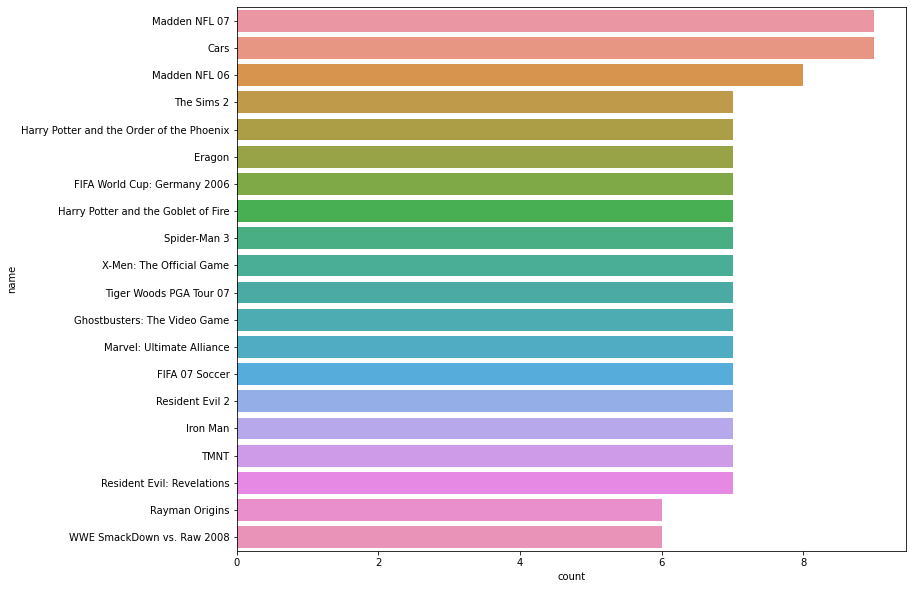

In [37]:
# top 20 by ordered by count

plt.figure(figsize=(12,10))

sns.countplot(y="name", data=games,order=games.name.value_counts().iloc[:20].index)
plt.show()

From the graph above, I can see that Madden NFL 07 and Cars are the game with the highest number reviews.

In [38]:
len(games['platform'].unique())

22

There are 22 unique platforms in this dataset.

### Platform

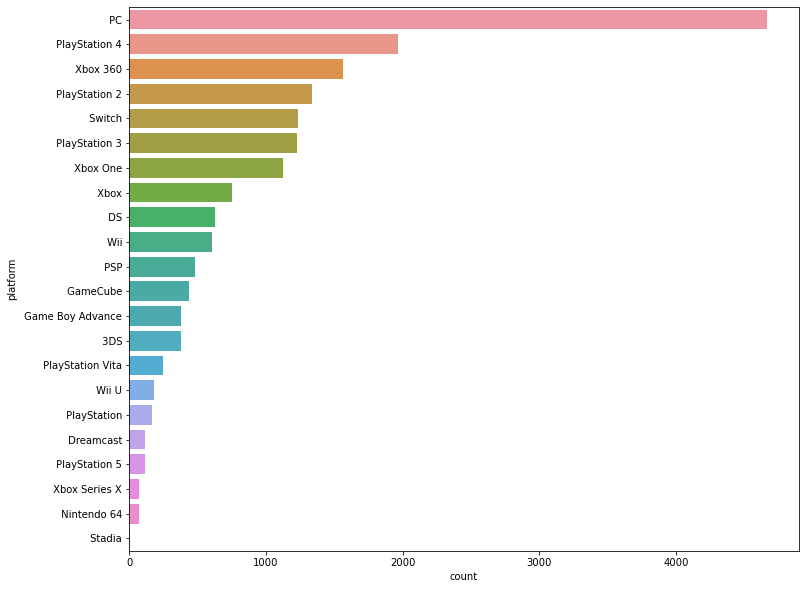

In [39]:
plt.figure(figsize=(12,10))

sns.countplot(y="platform", data=games,order=games['platform'].value_counts().index)
plt.show()

PC is the highest reviewed platform.

### Meta Score

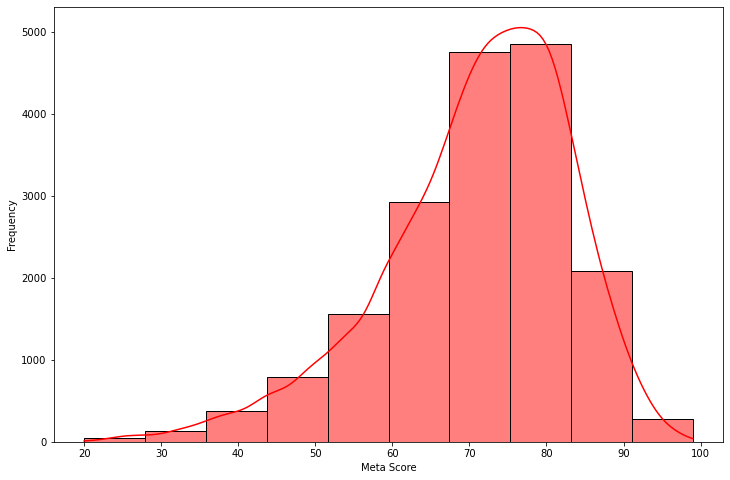

In [40]:
plt.figure(figsize=(12,8))

sns.histplot(data=games,x="meta_score",bins=10,kde=True,color='red')

plt.xlabel("Meta Score")
plt.ylabel('Frequency')
plt.show()

### User Review

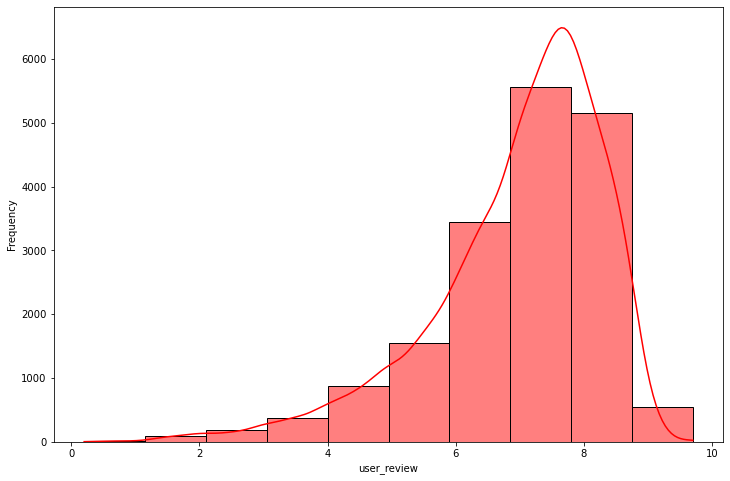

In [41]:
plt.figure(figsize=(12,8))

sns.histplot(data=games,x="user_review",bins=10,kde=True,color='red')

plt.xlabel("user_review")
plt.ylabel('Frequency')
plt.show()

### Release Year

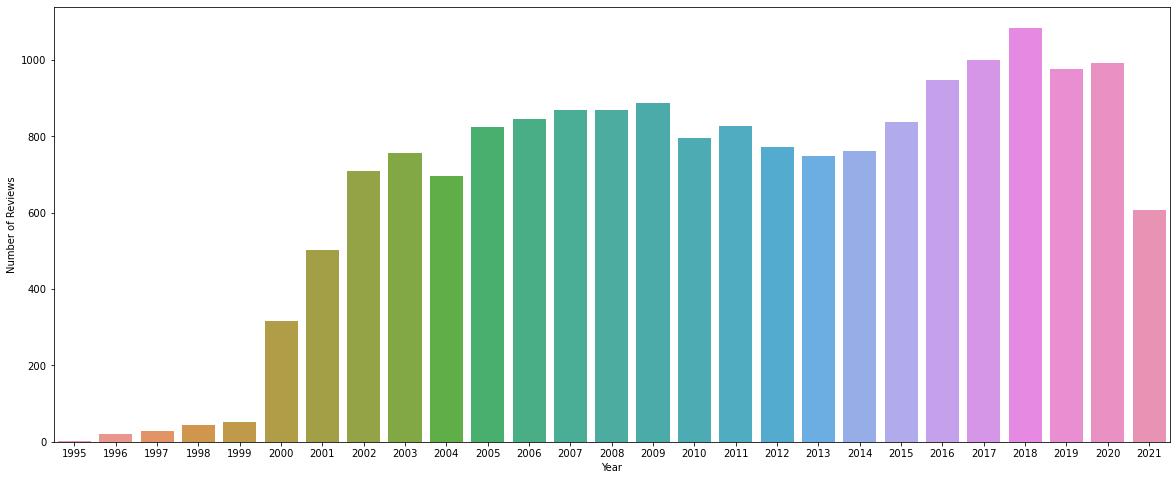

In [42]:
plt.figure(figsize=(20,8))

sns.countplot(x="release_year", data=games)
plt.xlabel("Year")
plt.ylabel('Number of Reviews')
plt.show()

### Release Month

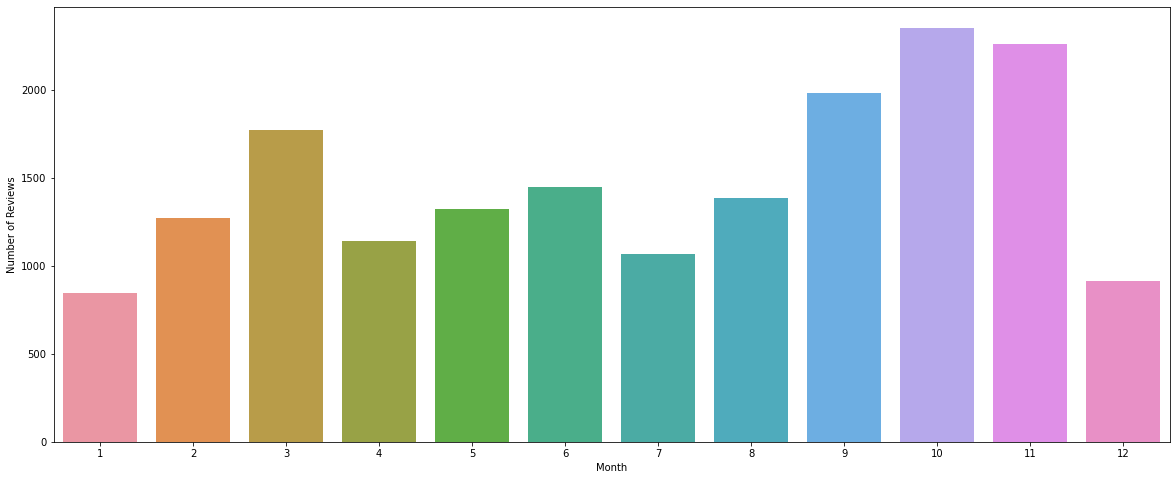

In [43]:
plt.figure(figsize=(20,8))

sns.countplot(x="release_month", data=games)
plt.xlabel("Month")
plt.ylabel('Number of Reviews')
plt.show()

# Pre-Processing

I will be modifying columns,adding features and preparing the data for the implementation of Natural Language Processing (NLP) and Machine Learning techniques.

In [44]:
games['meta_score'].describe()

count    17776.000000
mean        71.027171
std         12.232221
min         20.000000
25%         64.000000
50%         73.000000
75%         80.000000
max         99.000000
Name: meta_score, dtype: float64

In [45]:
# Encode as binary using median as threshold
games["meta_score"] = np.where(games["meta_score"] <73, 0, 1)

In [46]:
meta_score_percen=round(games['meta_score'].value_counts(normalize=True).sort_index()*100, 2)

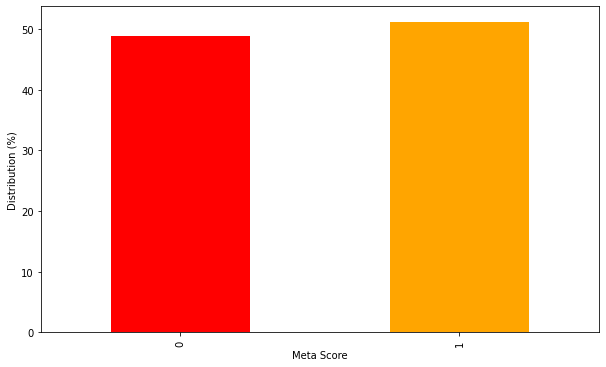

In [47]:
plt.figure(figsize=(10,6))

meta_score_percen.plot.bar(color=['red','orange'])
plt.xlabel('Meta Score')
plt.ylabel('Distribution (%)')
plt.show()


# Removes the square/round brackets and the texts inside it

In [48]:
games['summary'] = games['summary'].str.replace(r'\[(.*?)\]','', regex=True).astype('str')
games['summary'] = games['summary'].str.replace(r'\((.*?)\)','', regex=True).astype('str')

In [49]:
games.head()

,name,platform,summary,meta_score,user_review,release_year,release_month
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"As a young boy, Link is tricked by Ganondorf, ...",1,9.1,1998,11
1,Tony Hawk's Pro Skater 2,PlayStation,As most major publishers' development efforts ...,1,7.4,2000,9
2,Grand Theft Auto IV,PlayStation 3,What does the American Dream mean today? For ...,1,7.7,2008,4
3,SoulCalibur,Dreamcast,"This is a tale of souls and swords, transcendi...",1,8.4,1999,9
4,Grand Theft Auto IV,Xbox 360,What does the American Dream mean today? For ...,1,7.9,2008,4


The summary is now just a clean paragraph without any extra brackets that are redundant. All that's left is an easy-to-read paragraph.

# Dropping Redundant Columns

In [50]:
# Drop Columns
games= games.drop(columns=['name', 'user_review', 'release_year', 'release_month', 'platform'])
games.head()

,summary,meta_score
0,"As a young boy, Link is tricked by Ganondorf, ...",1
1,As most major publishers' development efforts ...,1
2,What does the American Dream mean today? For ...,1
3,"This is a tale of souls and swords, transcendi...",1
4,What does the American Dream mean today? For ...,1


In [51]:
games.shape

(17776, 2)

In [52]:
games.isna().sum()

summary       0
meta_score    0
dtype: int64

# Modeling

In [53]:
import nltk
import string
from nltk.stem import PorterStemmer

In [54]:
# import string & lists punctuations
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [55]:
stemmer = nltk.stem.PorterStemmer()

### Stopwords

In [56]:
nltk.download('stopwords')
from nltk.corpus import stopwords

ENGLISH_STOP_WORDS = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rkrav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [57]:
print(ENGLISH_STOP_WORDS)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [58]:
 def my_tokenizer(sentence):
    # remove punctuation and set to lower case
    for punctuation_mark in string.punctuation:
        sentence = sentence.replace(punctuation_mark,'').lower()

    # split sentence into words
    listofwords = sentence.split(' ')
    listofstemmed_words = []
    
    # remove stopwords and any tokens that are just empty strings
    for word in listofwords:
        if (not word in ENGLISH_STOP_WORDS) and (word!=''):
            # Stem words
            stemmed_word = stemmer.stem(word)
            listofstemmed_words.append(stemmed_word)

    return listofstemmed_words

## Define Dependent and Independent variable

In [59]:
y=games['meta_score']
X=games['summary']

In [60]:
X.shape

(17776,)

In [61]:
y.shape

(17776,)

In [62]:
X.head()

0    As a young boy, Link is tricked by Ganondorf, ...
1    As most major publishers' development efforts ...
2     What does the American Dream mean today? For ...
3    This is a tale of souls and swords, transcendi...
4     What does the American Dream mean today? For ...
Name: summary, dtype: object

In [63]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: meta_score, dtype: int32

In [64]:
y.unique()

array([1, 0])

# Train Test Split

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
# Setting test size to 20%, and training at 80%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)

In [67]:
X_train.shape

(14220,)

In [68]:
X_test.shape

(3556,)

In [69]:
y_train.shape

(14220,)

In [70]:
y_test.shape

(3556,)

In [71]:
import scipy.sparse
from sklearn.feature_extraction.text import TfidfVectorizer


In [72]:
tfidf_dummy = TfidfVectorizer(min_df=5,tokenizer=my_tokenizer) 

# Fit tfidf vectorizer
tfidf_dummy.fit(X_train)

# Transform
X_train_dummy_t = tfidf_dummy.transform(X_train)
X_test_dummy_t = tfidf_dummy.transform(X_test)

In [73]:
X_train_dummy_t.shape

(14220, 9399)

In [74]:
from sklearn.dummy import DummyClassifier

In [75]:
baseline = DummyClassifier() 
baseline.fit(X_train_dummy_t, y_train)

# Make predictions
y_pred_baseline_t = baseline.predict(X_test_dummy_t)

In [76]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report

In [77]:
round(accuracy_score(y_test, y_pred_baseline_t)*100, 2)

52.05

# Dummy Classification Report

In [78]:
# Classification Report 

print_line = "\n=======================================================\n"
print("Classification Report: Dummy Classifier", print_line)
class_report_baseline = classification_report(y_test, y_pred_baseline_t)
print(class_report_baseline)
print(print_line)

Classification Report: Dummy Classifier 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1705
           1       0.52      1.00      0.68      1851

    accuracy                           0.52      3556
   macro avg       0.26      0.50      0.34      3556
weighted avg       0.27      0.52      0.36      3556





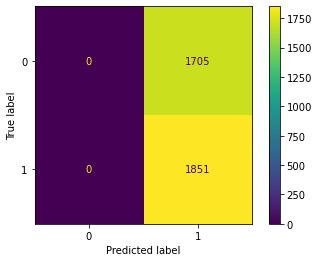

In [79]:
plot_confusion_matrix(baseline, X_test_dummy_t, y_test)